In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [26]:
df = pd.read_csv("/content/urls.csv")
# Check basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         9889 non-null   object
 1   url          9889 non-null   object
 2   category     9889 non-null   object
 3   subcategory  9876 non-null   object
 4   description  8011 non-null   object
 5   addresses    4332 non-null   object
 6   reporter     9886 non-null   object
dtypes: object(7)
memory usage: 540.9+ KB
None
                       name                              url  category  \
0  xn--myetherwallt-leb.com  http://xn--myetherwallt-leb.com  Phishing   
1         myelherwallel.com         http://myelherwallel.com  Phishing   
2         myetherwallet.cam         http://myetherwallet.cam  Phishing   
3               coindash.ru               http://coindash.ru  Phishing   
4          coin-wallet.info          http://coin-wallet.info  Phishing   

     subcategory                 

In [27]:
# Drop 'addresses' column if it has too many missing values
df.drop(columns=['addresses'], inplace=True)

# Fill missing 'subcategory' with 'Unknown'
df['subcategory'].fillna('Unknown', inplace=True)

# Fill missing 'description' with 'No description provided'
df['description'].fillna('No description provided', inplace=True)

# Verify changes
print(df.isnull().sum())


name           0
url            0
category       0
subcategory    0
description    0
reporter       3
dtype: int64


<ipython-input-27-35e946ce3834>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['subcategory'].fillna('Unknown', inplace=True)
<ipython-input-27-35e946ce3834>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

<ipython-input-28-d28d0b9afba3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['category'], order=df['category'].value_counts().index, palette='coolwarm')


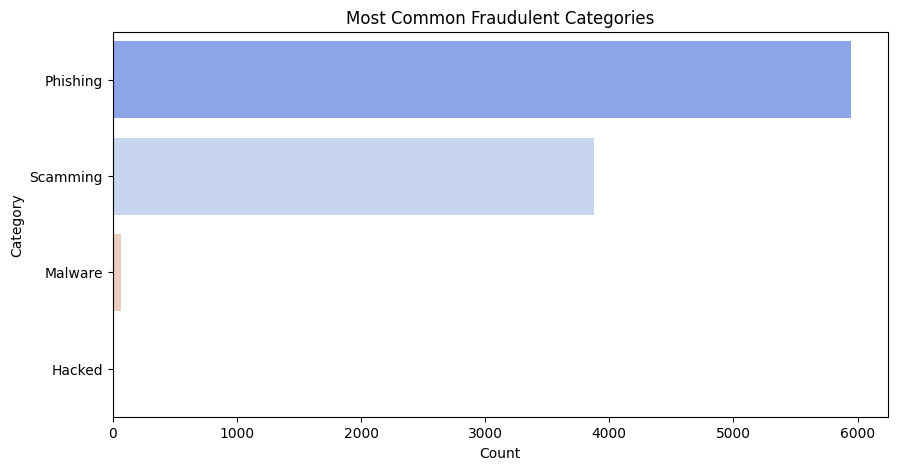

In [28]:
# Countplot for scam categories
plt.figure(figsize=(10,5))
sns.countplot(y=df['category'], order=df['category'].value_counts().index, palette='coolwarm')
plt.title("Most Common Fraudulent Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


<ipython-input-29-32980276fcfa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['subcategory'], order=df['subcategory'].value_counts().index[:10], palette='viridis')


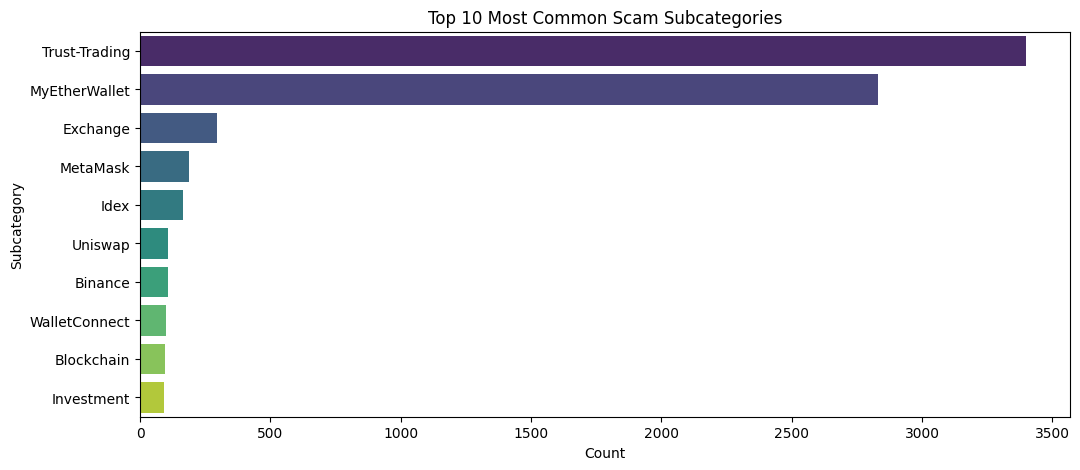

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(y=df['subcategory'], order=df['subcategory'].value_counts().index[:10], palette='viridis')
plt.title("Top 10 Most Common Scam Subcategories")
plt.xlabel("Count")
plt.ylabel("Subcategory")
plt.show()

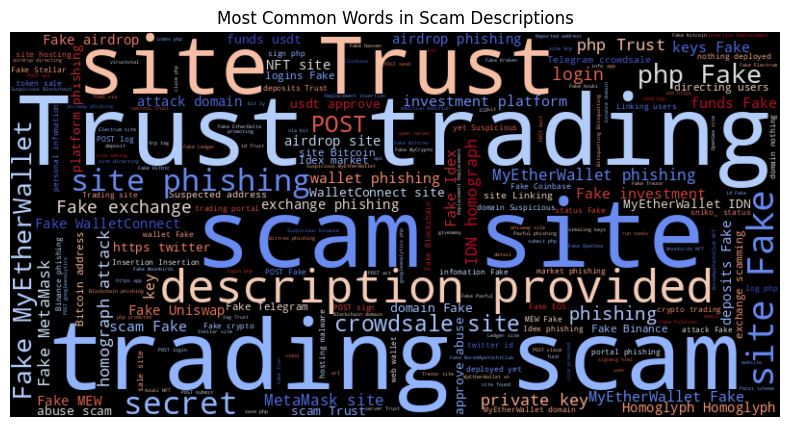

In [30]:
text = " ".join(desc for desc in df['description'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='coolwarm').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Scam Descriptions")
plt.show()

In [31]:
# URL length feature
df['url_length'] = df['url'].apply(len)

# Count number of special characters in URL
df['special_chars'] = df['url'].apply(lambda x: sum(1 for char in x if char in "!@#$%^&*()"))

# Check new features
print(df[['url', 'url_length', 'special_chars']].head())


                               url  url_length  special_chars
0  http://xn--myetherwallt-leb.com          31              0
1         http://myelherwallel.com          24              0
2         http://myetherwallet.cam          24              0
3               http://coindash.ru          18              0
4          http://coin-wallet.info          23              0


In [32]:
encoder = LabelEncoder()
df['category_encoded'] = encoder.fit_transform(df['category'])
df['subcategory_encoded'] = encoder.fit_transform(df['subcategory'])

# Check encoding
print(df[['category', 'category_encoded']].head())

   category  category_encoded
0  Phishing                 2
1  Phishing                 2
2  Phishing                 2
3  Phishing                 2
4  Phishing                 2


In [33]:
# Features and target
X = df[['url_length', 'special_chars']]
y = df['category_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Check accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.6228513650151668
